# Term Project - CS329E
## Contributors:
## Keigan Kincaid KDK996
## Joshua Yoh 

### 1. Description

The goal of this project assignment is to develop a data analytics project using a real-world
dataset. Students should select a public dataset, think about a research project, for example,
t-test, two-sample hypothesis tests, regression models, classification, clustering, or any data
analytic task, implement the data model (using libraries or without libraries), evaluate, and
interpret the results. You can apply more than one data model.

### 2. Public Dataset List

Select a data set from the available public datasets.
You can find a list of such public data sets here:
http://www.teymourian.de/public-data-sets-for-data-analytic-projects/)
    
• The data set must not be very Large.

• You can reuse one of the assignment data sets.

### 3. Define a Project (4 Points)

Define a data science research question based on the selected dataset. You can select one of
the listed datasets or search on the web, and pick up one of the available public datasets.
You should describe the following items:

#### 1. What is your data set about?

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. A preliminary report is available online within a few days of an accident. Factual information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. The dataset is updated monthly in Microsoft Access 2000 MDB format. For this project in particular we decided to to use a version of the dataset only including incidents from 2008 to the Present. Our decision for this was largely due to the fact that the datasets before 2008 did not distinguish whether the event represented the pilot controlling the aircraft at the time or whether the event was associate with co-pilots, crew, or passengers. In order to appropriatly address our research question and reduce our sample size from over 100,000 events to around 8000. The dataset was originally accessed via Excel in the Microsoft Access 2000 MDB format. From there we selected the appropriate variables and compiled them into a single Excel file where we were able to remove repeats, and null values. Finally we saved this subset of the original Microsoft Access Database in a CSV format.

#### 2. Clean up your data and reduce it to no more than 2000 observations if your data set is very large.

As our dataset was around 8000 observations we split used 6000 observations as test data, and 2000 observations as test data. The process of cleaning the data is described in more detail above.

#### 3. What is exactly your research question? What do you want to learn from data? What is your learning model ,e.g., a Classification, Clustering, etc?

##### Research Question: Are young inexperienced pilots more likely to suffer from fatal or severe injury in fixed wing general aviation aircraft incidents as oppsed to there older more experienced counter parts?

In the study we hope to create a model that can classify injury level based upon pilot age, measured in years of age, and experienced, measured in hours actively piloting an aircraft. It is important to note that flight hours are measured by the amount of hours a plane has been operating an aircraft, which is kept in a log and verified in annual inspections by a third party in part to ensure the airworthiness of the vehicle, as well as, its pilot. Further hours may be logged while completing training excersises as a co-pilot or with guided instruction for a CFI (Certified Flight Instructor.) Time logged in simulators or ground school are not included in pilot flight hours. In this study we are looking to use an industry standard classifier called an SVM ** TODO **

#### 4. What is your current exception about the results?

#### 5. How do you want to evaluate your project? How to access the correctness of your model? How well would you expect that the model will work?

### 4 Implementation (6 Points)

• You need to implement your project in python. You are allowed to use any Machine
Learning Library like scikit-learn1. You are also allowed to implement your project
without using any libraries.

• You can use Jupyter Notebooks to implement your project and provide your documen-
tations.

• You code should be completed and be compilable without any errors. We should be
able to read your documents, and be able to run your project.

• Run your implementation (on your Laptop or on Cluster if data is large) and generate
the results.
• Provide the interpretations of your results.
• What can you do to improve your results? Apply your ideas to improve your results.
• Provide any references that you have used.

### 5 Create Recorded Presentation Video of your Project (5 Points)

• Create a document or a presentation (You can create a presentation using your Jupyter
notebook, or create a powerpoint presentation, or other formats) to describe your
project and results

• Describe your code.

• Describe the results of your project in a professional way.

• You may want to visualization diagrams and describe the results based on some dia-
grams - but having diagrams is not a MUST have to get the full credit.

• Describe the model and results of your project in a way that every person in this field
can read, enjoy and understand.
Record your presentation in form of a video recording. Present your talk on your laptop
computer and record it using a desktop recording software.
You should use your webcam so that we can identify who is presenter.
You have the following 3 options to create a presentation video:

• Method 1: You can use the Panopto Deskop Recorder. You can find this software
and documentations here https://www.panopto.com/.

• Method 2: You can record your presentation using ZOOM client application, start
your zoom client, start a zoom meeting (you will be the only participant), click on
share your desktop, turn on camera and record your presentation, end the zoom session
and you will get a MP4 video file of your presentation. Upload the file to Blackboard
system.

• Method 3: Alternatively, you can use any desktop recording software, generate a MP4
file and upload MP4 to blackboard, or upload it to some other cloud storage (like google
Drive, DropBox) and share with us the URL Link of your presentation (submit the link
in Blackboard).

Note 1: Your video presentation should be between 8 minutes to maximum 15 minutes
long (Min 8 mi, Max 15 min)

Note 2: You should turn on your Web Camera so that we can see your face during the
presentation, and be able to identify the presenter.
Grading will be based on quality of your presentation, and correct describing of algorithms
or concepts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [2]:
# loading in our crash data
crash_df = pd.read_csv('crash_Dataset.csv')
crash_df

,ev_id,crew_age,crew_inj_level,flight_hours
0,20080514X00667,54,0,14500.0
1,20080312X00305,42,0,10000.0
2,20080827X01333,56,3,1200.0
3,20090526X53909,61,1,367.0
4,20090718X25941,65,0,1.0
...,...,...,...,...
8420,20200921X72553,70,1,7.9
8421,20200921X15712,61,0,0.0
8422,20200922X34530,46,0,1900.0
8423,20200922X90108,74,0,650.0


In [3]:
# Implementation of SVM without Libraries

In [34]:
# splitting into features and targets, X and Y respectively
X = crash_df[['crew_age', 'flight_hours']]
Y = crash_df['crew_inj_level']

# splitting the data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=0)

# re-indexing in dataframe
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [35]:
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

In [36]:
def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X.loc[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

In [37]:
# adding column of ones for matrix multiplication (dot product)
x_0 = [1]*len(X_train)
X_train['x_0'] = x_0
X_train = X_train[['x_0', 'crew_age', 'flight_hours']]

x_01 = [1]*len(X_test)
X_test['x_0'] = x_01
X_test = X_test[['x_0', 'crew_age', 'flight_hours']]

# same length as previous matrices
weights = np.zeros(3)

<ipython-input-37-a3804fc03acc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['x_0'] = x_01


In [38]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learning_rate = 0.1

regularization = 0.001

cost_list = []

for i in range(0, num_iterations):
    
    # current iteration cost
    cost = compute_cost(X_train, Y_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "\n", "Weights:\n", weights, "\n")
    
    # appending current iteration cost
    cost_list.append(cost)
    
    # gradient descent (optimization)
    grad = calculate_gradient(X_train, Y_train, weights, regularization)
    
    # updating the weights
    weights = weights - learning_rate * grad

Epoch 0 Cost is: 0.001 
 Weights:
 [0. 0. 0.] 

Epoch 1 Cost is: 0.021387632583849986 
 Weights:
 x_0             0.000088
crew_age        0.004961
flight_hours    0.203773
Name: 0, dtype: float64 

Epoch 2 Cost is: 0.017446251277821716 
 Weights:
 x_0             0.000092
crew_age        0.005155
flight_hours    0.183405
Name: 0, dtype: float64 

Epoch 3 Cost is: 0.014254095621138328 
 Weights:
 x_0             0.000096
crew_age        0.005324
flight_hours    0.165075
Name: 0, dtype: float64 

Epoch 4 Cost is: 0.011668854272680234 
 Weights:
 x_0             0.000099
crew_age        0.005479
flight_hours    0.148579
Name: 0, dtype: float64 

Epoch 5 Cost is: 0.009575198219532639 
 Weights:
 x_0             0.000103
crew_age        0.005649
flight_hours    0.133734
Name: 0, dtype: float64 

Epoch 6 Cost is: 0.007879760799096802 
 Weights:
 x_0             0.000107
crew_age        0.005806
flight_hours    0.120376
Name: 0, dtype: float64 

Epoch 7 Cost is: 0.006506707547003545 
 Weight

Epoch 55 Cost is: 0.0006806362256324931 
 Weights:
 x_0             0.000185
crew_age        0.008878
flight_hours    0.002616
Name: 0, dtype: float64 

Epoch 56 Cost is: 0.0006806304492739984 
 Weights:
 x_0             0.000186
crew_age        0.008885
flight_hours    0.002592
Name: 0, dtype: float64 

Epoch 57 Cost is: 0.000680625830242742 
 Weights:
 x_0             0.000186
crew_age        0.008889
flight_hours    0.002570
Name: 0, dtype: float64 

Epoch 58 Cost is: 0.0006806220888274242 
 Weights:
 x_0             0.000186
crew_age        0.008893
flight_hours    0.002551
Name: 0, dtype: float64 

Epoch 59 Cost is: 0.0006806194166890354 
 Weights:
 x_0             0.000186
crew_age        0.008896
flight_hours    0.002533
Name: 0, dtype: float64 

Epoch 60 Cost is: 0.0006806175382581262 
 Weights:
 x_0             0.000186
crew_age        0.008900
flight_hours    0.002520
Name: 0, dtype: float64 

Epoch 61 Cost is: 0.0006806160739991097 
 Weights:
 x_0             0.000186
crew_a

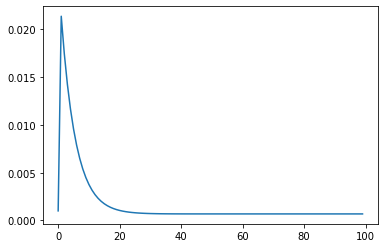

In [39]:
# plot cost per iteration
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [40]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

In [41]:
svm_predict = predict_svm(weights, X_test)

print("Accuracy Score:", accuracy_score(Y_test, svm_predict))

print(classification_report(Y_test, svm_predict))

Accuracy Score: 0.16488730723606168
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.16      1.00      0.28       139
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00       140

    accuracy                           0.16       843
   macro avg       0.04      0.25      0.07       843
weighted avg       0.03      0.16      0.05       843



/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/goldilocks/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implementation of SVM using Libraries

In [124]:
model = svm.SVC()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [125]:
print("Accuracy Score:", accuracy_score(Y_test, y_pred), "\n")

print(classification_report(Y_test, y_pred))

Accuracy Score: 0.5768545994065282 

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       959
           1       0.00      0.00      0.00       264
           2       0.00      0.00      0.00       163
           3       0.53      0.10      0.16       299

    accuracy                           0.58      1685
   macro avg       0.28      0.27      0.22      1685
weighted avg       0.42      0.58      0.44      1685



C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1308: Unde